In [2]:
import pandas as pd
from glob import glob

In [6]:
dfc = pd.read_csv('../../../00_data/BLCA/IMVigor210_clinical.tsv',sep ='\t', index_col=0)


In [21]:
csvs = ['./results/Imvigor210_1.csv',
 './results/Imvigor210_2.csv',
 './results/Imvigor210_3.csv',
 './results/Imvigor210_4.csv']
res = [pd.read_csv(csv, index_col=0, header=None) for csv in csvs]
dfs = pd.concat(res)
dfs.columns = ['ENLIGHT']
dfs.index = dfs.index.map(dfc.reset_index().set_index('Sample_id').Index)

df = dfs.loc[dfc.index]
df.to_csv('./results/Imvigor210_EMS_score.csv')

In [22]:
df = dfc.join(dfs)
df.head()

,Sample_id,response_label,RECIST,Timing,cohort,cancer_type,sequencer,ICI,ICI_target,Tissue,...,Tobacco Use History,Met Disease Status,Received platinum,Sample collected pre-platinum,sizeFactor,ANONPT_ID,Lund,Lund2,TCGA Subtype,ENLIGHT
Index,,,,,,,,,,,,,,,,,,,,,
IMVigor210-0257bb-ar-0257bbb,SAM0257bbbbd388,NR,SD,Pre,IMVigor210,BLCA,HiSeq2500,Atezolizumab,PD-L1,bladder,...,PREVIOUS,Visceral,Y,Y,1.567678,10232,MS2a1,Genomically unstable,II,0.445886
IMVigor210-025b45-ar-025b45c,SAM025b45c27e05,NR,PD,Pre,IMVigor210,BLCA,HiSeq2500,Atezolizumab,PD-L1,bladder,...,PREVIOUS,Liver,Y,N,1.648825,10346,MS2b1,Infiltrated,III,0.542013
IMVigor210-032c64-ar-032c642,SAM032c642382a7,NR,PD,Pre,IMVigor210,BLCA,HiSeq2500,Atezolizumab,PD-L1,bladder,...,PREVIOUS,Visceral,Y,Y,1.494813,10166,MS2b2.2,Basal/SCC-like,IV,0.944709
IMVigor210-0571f1-ar-0571f17,SAM0571f17f4045,NR,SD,Pre,IMVigor210,BLCA,HiSeq2500,Atezolizumab,PD-L1,lymph node,...,PREVIOUS,LN Only,Y,NaN,1.032197,10085,MS2b1,Infiltrated,II,0.779298
IMVigor210-065890-ar-0658907,SAM065890737112,R,CR,Pre,IMVigor210,BLCA,HiSeq2500,Atezolizumab,PD-L1,bladder,...,PREVIOUS,LN Only,Y,Y,1.438738,10341,MS1b,UroA,II,0.543767


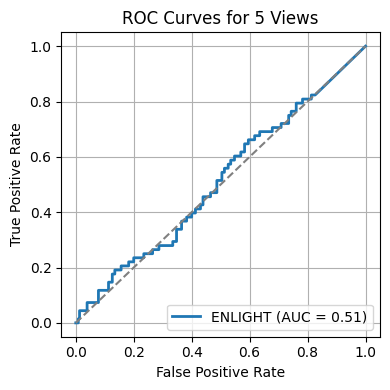

In [23]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 将响应标签转换为二进制标签
df['label_bin'] = df['response_label'].map({'R': 1, 'NR': 0})

# 初始化绘图
plt.figure(figsize=(4, 4))

# 为每一列绘制 ROC 曲线
for col in ['ENLIGHT']:
    fpr, tpr, _ = roc_curve(df['label_bin'], df[col])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{col} (AUC = {roc_auc:.2f})')

# 添加对角线、图例等
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for 5 Views')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()